<a href="https://colab.research.google.com/github/minseo1039/2021_PNUAC_AIData/blob/main/08_codelab4_seaborn_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화(data visualization)
+ 데이터 분석 결과를 쉽게 이해할 수 있도록 시각적으로 표현하고 전달되는 과정
+ 데이터 시각화를 통해 데이터에 내재된 트렌드, 이상치, 패턴등을 파악

🏷️ **코랩 환경에서 한글 폰트 사용하기**


---



In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#한글 폰트 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#그래프에서 마이너스 기호가 표시
plt.rcParams['axes.unicode_minus'] = False  

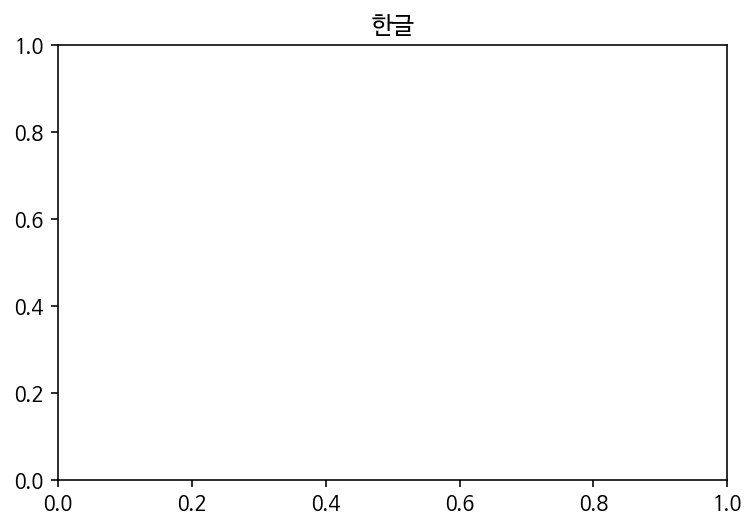

In [3]:
plt.title('한글')
plt.show()

🏷️ **python 노트 : 경고무시**


---

In [4]:
import warnings
warnings.filterwarnings('ignore')

&#9997; **pandas 노트 : 외부데이터 가져오기**


---
+ **외부 데이터 가져오기**
  + csv 읽기
    - 한글 파일명을 사용할 경우 : df = pd.read_csv(‘파일명‘, engine='python')
    - 파일 내용 한글이 깨지는 경우 : df = pd.read_csv(‘파일명‘, engine='python', encoding='cp949')
  >
  ```
  df = pd.read_csv(‘파일명‘)
  ```

  + 엑셀 읽기
    - 한글 파일명을 사용할 경우 : df = pd.read_excel(‘파일명‘)
  >
  ```
  df = pd.pd.read_excel(‘파일명‘)
  ```
---



In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2021_PNUAC_AIData-main/data/news.csv')
df.head()

,순위,제목,댓글수,언론사,감성,신뢰도
0,1,[단독] 김건희 또 다른 논문 영문 초록 한 문장 뺀 94% 표절 의혹,3559,세계일보,부정,0.967285
1,2,"윤석열 장모 작은어머니 ""명신이(김건희)가 양 검사 꽉 쥐고 있다""",3542,오마이뉴스,부정,0.912109
2,3,"윤석열 만난 김영환 ""지식정리돼 있고 지혜로운 분 걱정없다""",3123,뉴스1,긍정,0.990723
3,4,윤석열-김건희 연결해줬다는 '스님'의 정체는?,2566,오마이뉴스,중립,0.707520
4,5,정경심 PC 숨겨준 자산관리인..'증거은닉' 유죄 확정,2454,JTBC,부정,0.996094


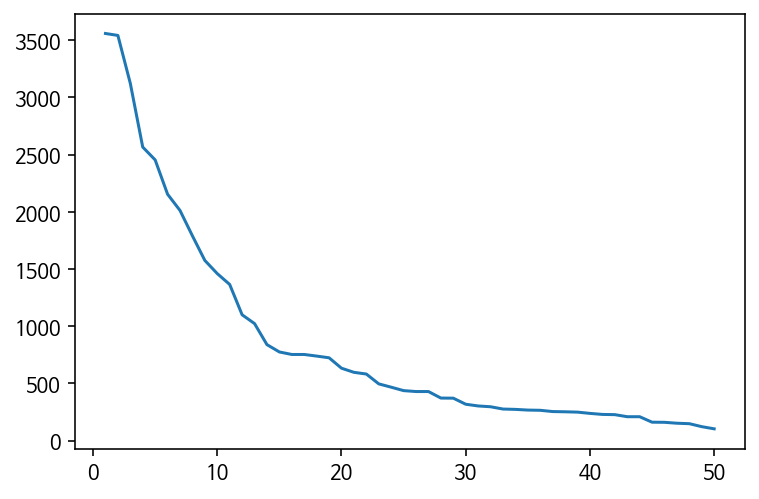

In [8]:
plt.plot(df['순위'], df['댓글수'])
plt.show()

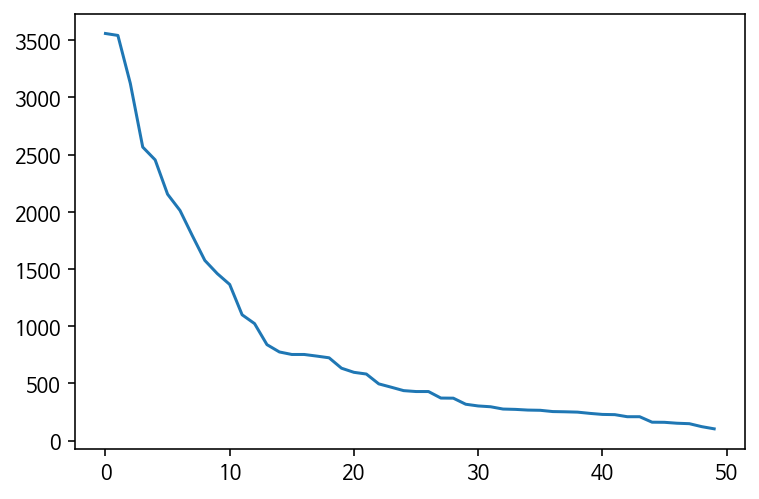

In [9]:
df['댓글수'].plot()
plt.show()

# Seaborn
+ Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
+ 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존
+ 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공하기 때문에 데이터 분석에 활발히 사용되고 있는 패키지
+ 다차원 데이터 분석시 고려 사항
  + 분석하고자 하는 데이터가 모두 실수 값인 경우
  + 분석하고자 하는 데이터가 모두 카테고리 값인 경우
  + 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우



In [10]:
import seaborn as sns

## barplot
+ **카테고리 값에 따른 실수 값**의 평균과 편차를 표시하는 기본적인 바 차트를 생성
+ 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시

In [11]:
df['언론사'].value_counts()

뉴스1      5
JTBC     5
중앙일보     4
머니투데이    4
YTN      3
연합뉴스     3
뉴시스      3
아시아경제    2
세계일보     2
MBC      2
서울신문     2
조선일보     2
오마이뉴스    2
한국일보     1
국민일보     1
동아일보     1
KBS      1
헤럴드경제    1
SBS      1
노컷뉴스     1
매일경제     1
경향신문     1
이데일리     1
쿠키뉴스     1
Name: 언론사, dtype: int64

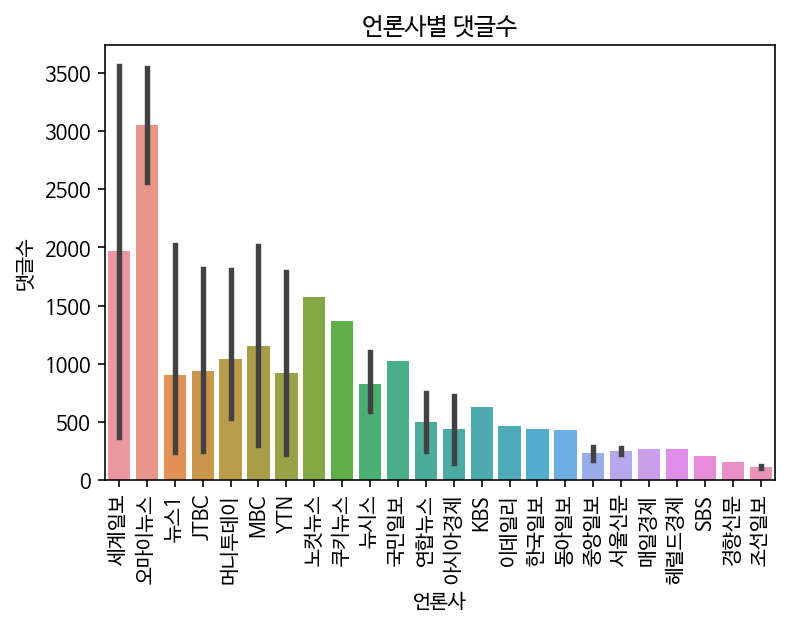

In [12]:
sns.barplot(x = '언론사', y='댓글수', data=df)
plt.xticks(rotation=90)
plt.title('언론사별 댓글수')
plt.show()

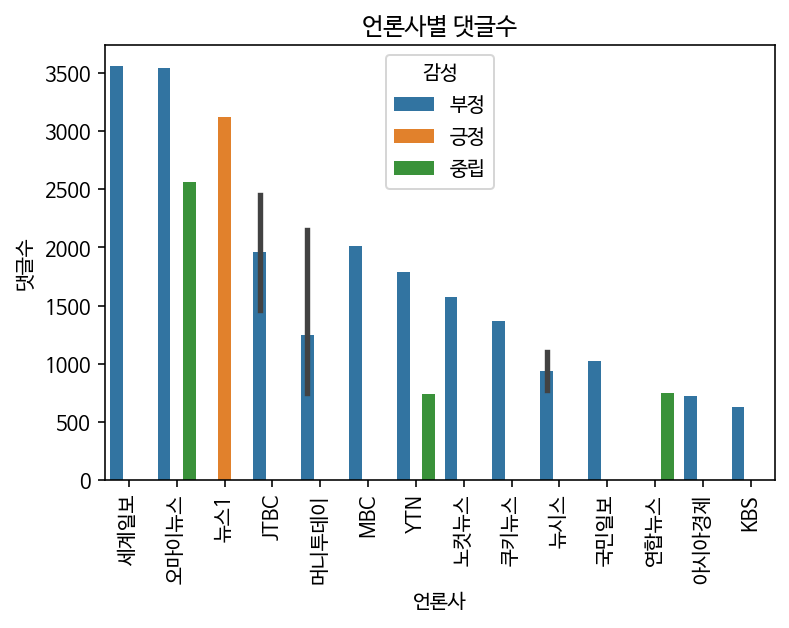

In [13]:
sns.barplot(x = '언론사', y='댓글수', hue='감성', data=df[:20])
plt.xticks(rotation=90)
plt.title('언론사별 댓글수')
plt.show()

## histplot
* **수치형(numerical) 데이터 분포**를 정확하게 표현해주는 그래픽

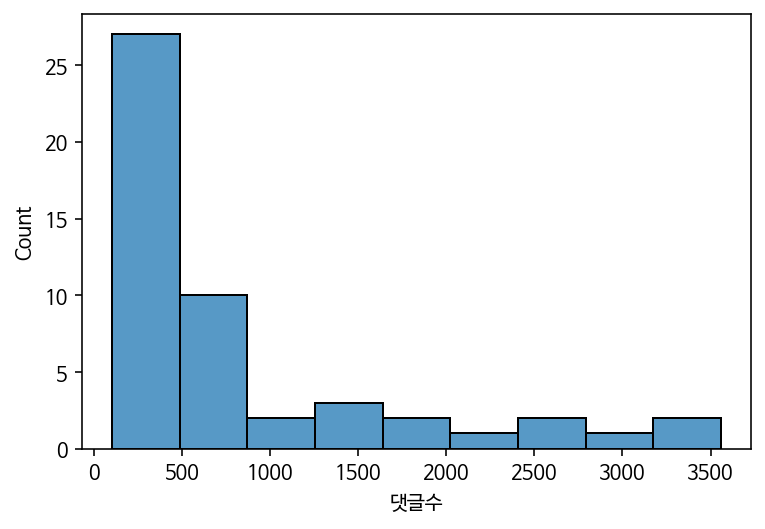

In [14]:
sns.histplot(x = '댓글수', data=df) 
plt.show()

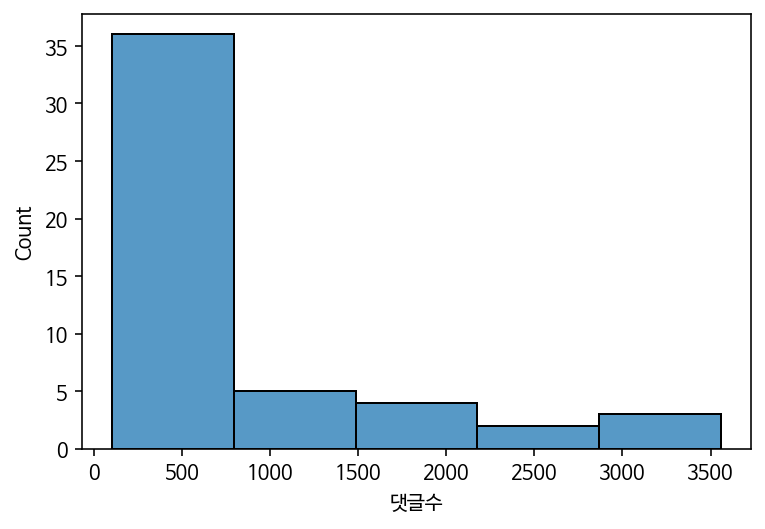

In [15]:
sns.histplot(x = '댓글수', bins=5, data=df) 
plt.show()

## distplot 
+ 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용
  + 커널 밀도(kernel density): 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법
+ **수치형** 열을 인수

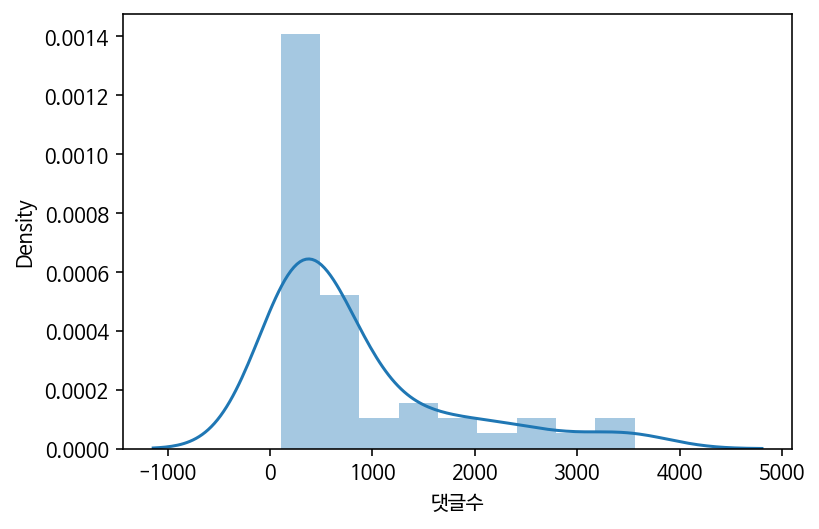

In [16]:
sns.distplot(df['댓글수'], kde = True) 
plt.show()

## boxplot
+ 카테고리별 수치 데이터의 범위를 보여주고, 데이터분포와 ‘이상치’가 있는지 확인 가능
+ 구성
  - 상자는 사분위 범위.
  - 상자 가운데의 선은 중앙값(median)
  - 맨 끝의 선은 1분위와 3분위
  - 상자 바깥점은 이상치

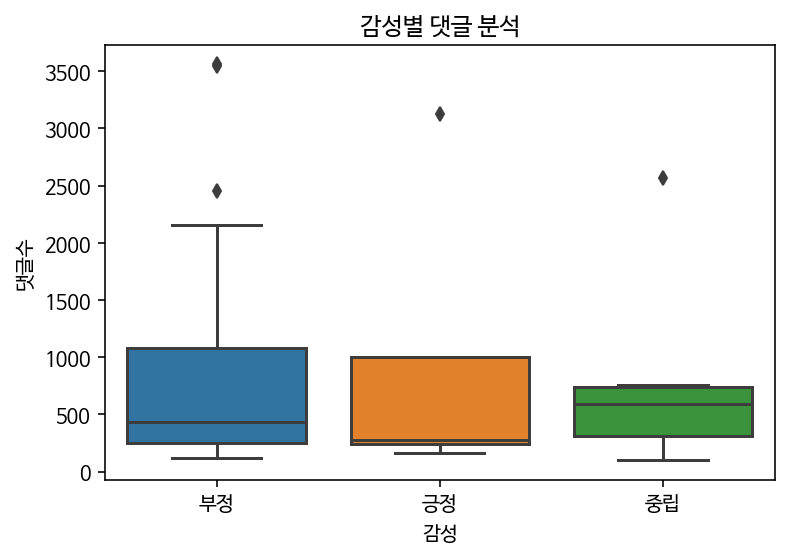

In [17]:
sns.boxplot(x='감성', y='댓글수', data=df)
plt.title("감성별 댓글 분석")
plt.show()

## count plot
+ 각 **카테고리 값**별로 데이터가 얼마나 있는지 표시

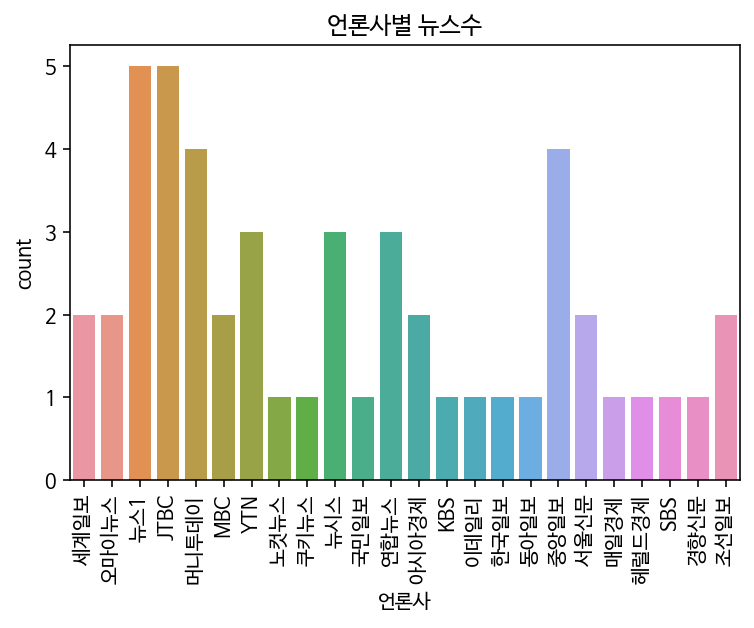

In [18]:
sns.countplot(x = '언론사', data=df)
plt.xticks(rotation=90)
plt.title('언론사별 뉴스수')
plt.show()

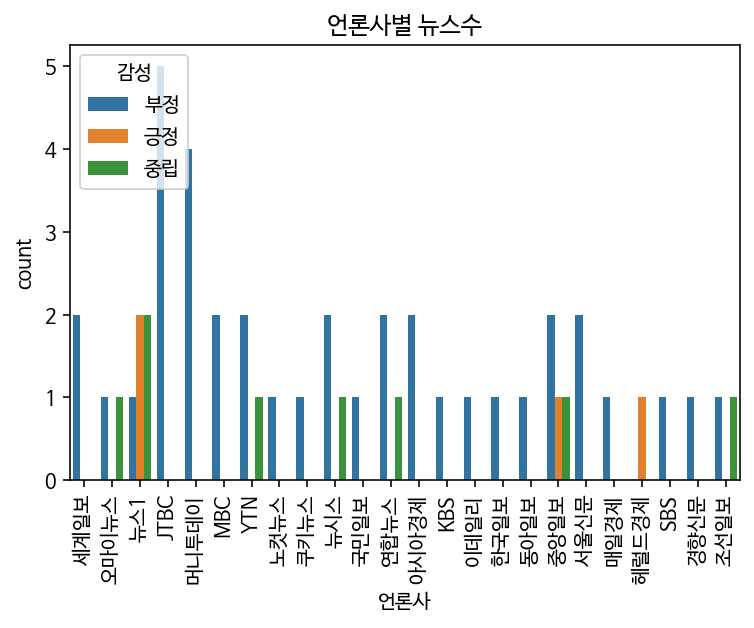

In [19]:
sns.countplot(x = '언론사', hue='감성', data=df)
plt.xticks(rotation=90)
plt.title('언론사별 뉴스수')
plt.show()

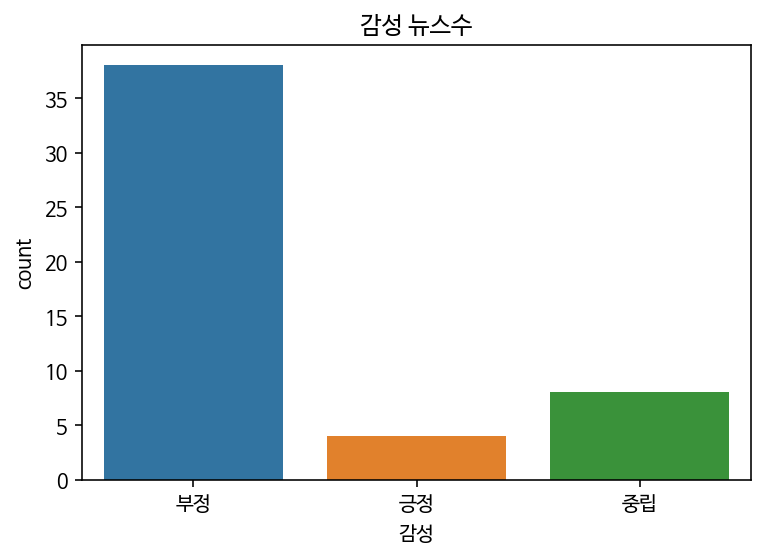

In [20]:
sns.countplot(x = '감성', data=df)
plt.title('감성 뉴스수')
plt.show()

&#9997; **Seborn 노트 : 수치값 표현**


---
+ ax.patches : ax가 가르키는 그래프에서, 막대들을 담고있는 리스트 
+ p.get_bbox().bounds : 막대그래프의 정보를 나타냄.(p는 해당 막대)
  + 왼쪽, 아래, 막대그래프의 폭, 높이에 대한 정보 
+ ax.annotate(s, (x, y), ha=값) : 그래프 안에 특정 위치에 문자열
  + ha : horizontal align 
---

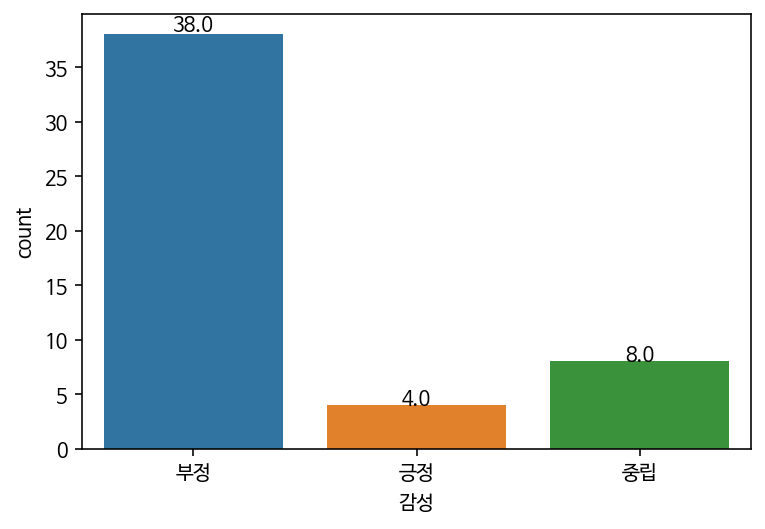

In [21]:
ax = sns.countplot(x = '감성', data=df)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(height, (left+width/2, height*1.01), ha='center')
plt.show()

## scatter plot
+ 두 개의 수치값에 대한 관계를 파악

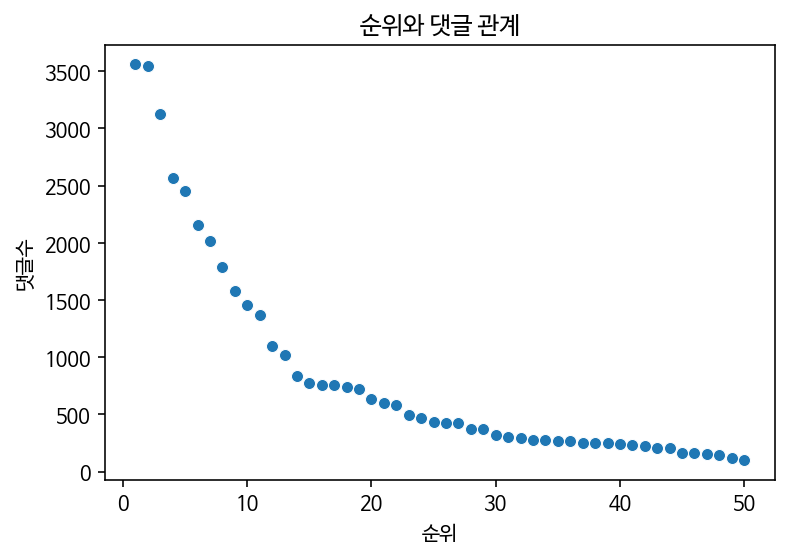

In [22]:
sns.scatterplot(x='순위', y='댓글수', data=df)
plt.title("순위와 댓글 관계")
plt.show()

## pairplot 
+ 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 scatter plot

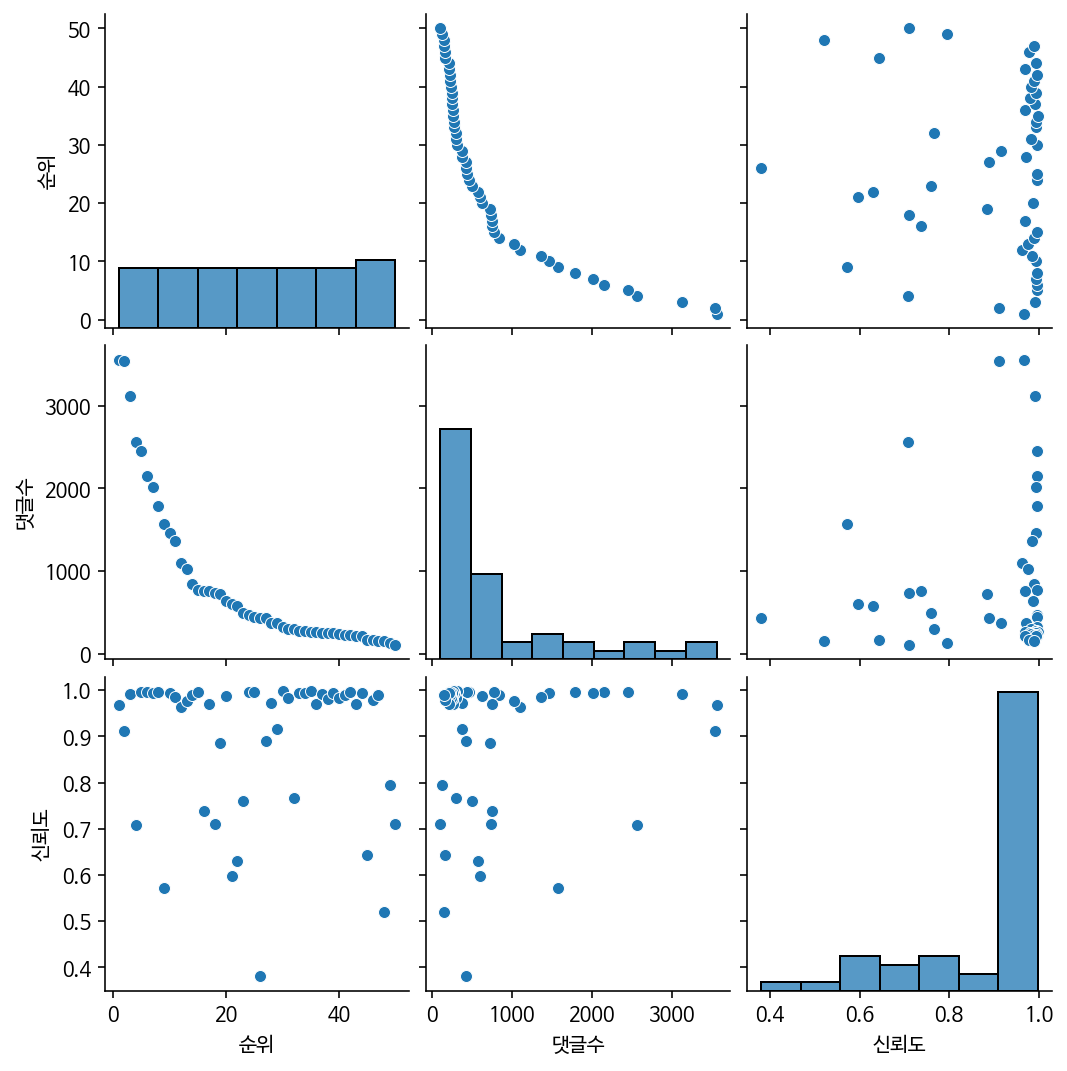

In [23]:
sns.pairplot(df) 
plt.show()

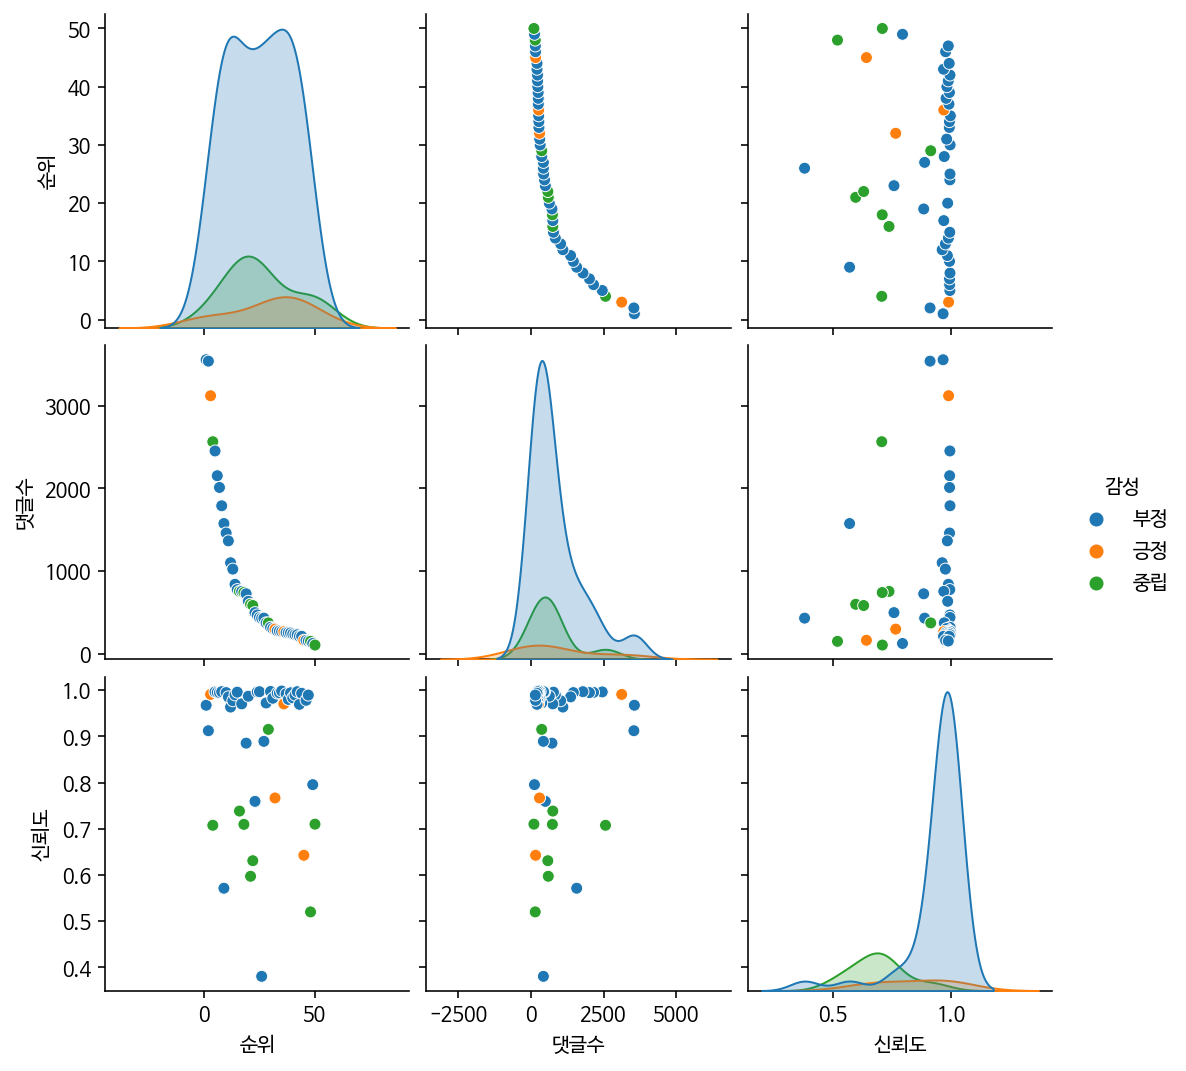

In [24]:
sns.pairplot(df, hue='감성') 
plt.show()

&#9997; **pandas 노트**


---
+ **피벗테이블**
  + 피봇테이블(pivot table): 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것
  + pivot(행 인덱스로 사용할 열 이름, 열 인덱스로 사용할 열 이름, 데이터로 사용할 열 이름)
    + **행인덱스와 열인덱스로 데이터가 단 하나만 찾아져야 함**

+ **groupby**
  + **키가 지정하는 조건에 맞는 데이터가 하나 이상이라서 데이터 그룹을 이루는 경우**
  + groupby(그룹할 열인덱스).연산함수()
    + size, count: 그룹 데이터의 갯수
    + mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
    + sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수

+ **상관관계**
  + corr() : 각 변수간의 상관계수 출력

## heatmap
+ 데이터가 2차원이고 모든 값이 카테고리 값

In [25]:
dfg = df.groupby(['언론사','감성'])[['순위']].count()
dfg = dfg.reset_index() 
dfg

,언론사,감성,순위
0,JTBC,부정,5
1,KBS,부정,1
2,MBC,부정,2
3,SBS,부정,1
4,YTN,부정,2
5,YTN,중립,1
6,경향신문,부정,1
7,국민일보,부정,1
8,노컷뉴스,부정,1
9,뉴스1,긍정,2


In [26]:

dfgv = dfg.pivot('언론사', '감성', '순위')
dfgv

감성,긍정,부정,중립
언론사,,,
JTBC,NaN,5.0,NaN
KBS,NaN,1.0,NaN
MBC,NaN,2.0,NaN
SBS,NaN,1.0,NaN
YTN,NaN,2.0,1.0
경향신문,NaN,1.0,NaN
국민일보,NaN,1.0,NaN
노컷뉴스,NaN,1.0,NaN
뉴스1,2.0,1.0,2.0


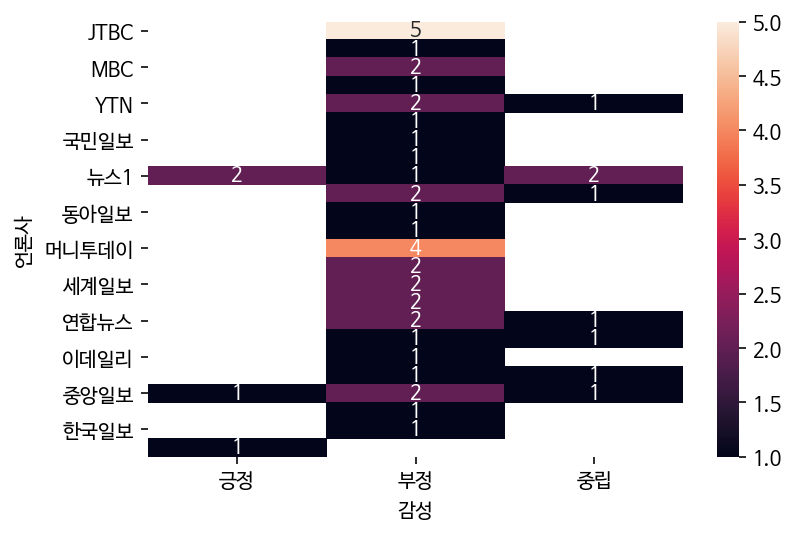

In [27]:
sns.heatmap(dfgv, annot=True)
plt.show()

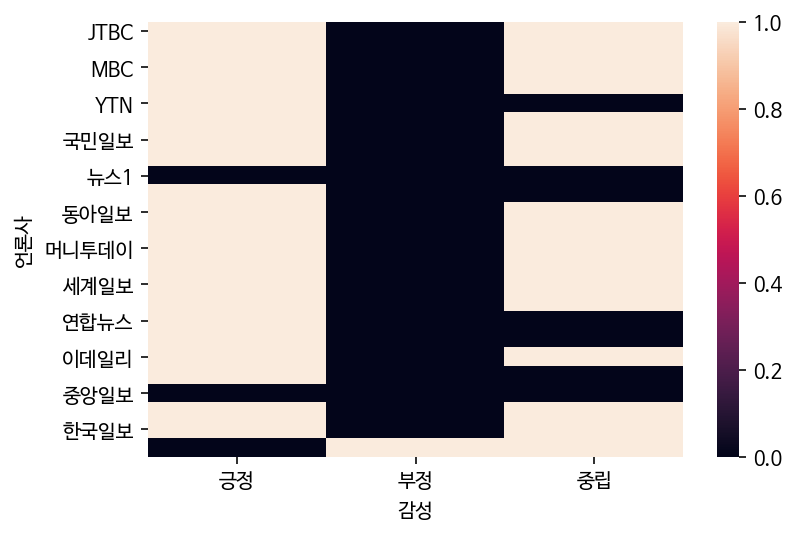

In [28]:
sns.heatmap(dfgv.isnull())
plt.show()

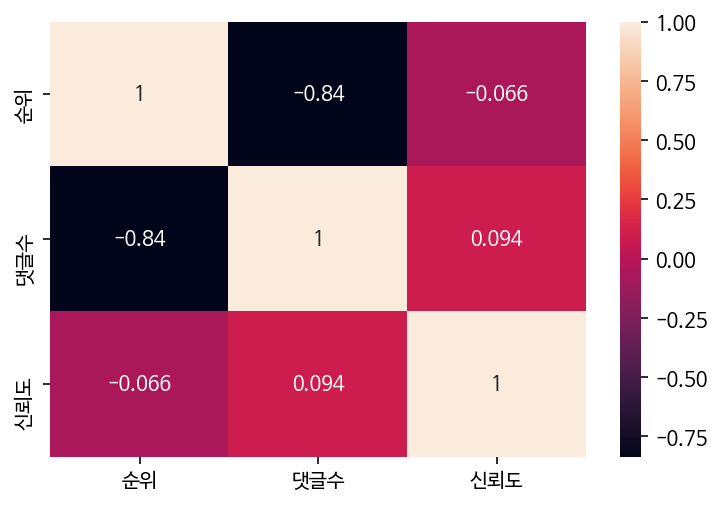

In [29]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## 해결문제
---
대학 알리미 사이트에서 대학등록금 현황 자료를 받아서 다음 그림을 그리시오.
+ 지역별 설립구분별 학교수
+ 지역별 등록금 평균 
+ 평균등록금 보다 많이 내는 학교수를 지역별 카운트 그래프

+ [대학알리미] : https://www.academyinfo.go.kr/search/search.do


In [30]:
df = pd.read_excel('/content/drive/MyDrive/2021_PNUAC_AIData-main/data/등록금 현황_2021.xlsx')
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),120000.0,6758560.2,6758560.2,5849683.7,7206556.7,0.0,0.0,0.0
2,2021.0,대학교,사립,경기,기존,가천대학교,318000.0,8249738.7,8249738.7,7098467.3,8283509.9,9177055.6,9076000.0,9890000.0
3,2021.0,대학교,사립,강원,기존,가톨릭관동대학교,154000.0,7165673.8,7165673.8,6157422.8,7459344.9,8218086.6,8135562.7,9850000.0
4,2021.0,대학교,사립,충북,기존,가톨릭꽃동네대학교,0.0,7152463.0,7152463.0,6618000.0,7796000.0,0.0,0.0,0.0


In [31]:
df = df.drop(0)
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),120000.0,6758560.2,6758560.2,5849683.7,7206556.7,0.0,0.0,0.0
2,2021.0,대학교,사립,경기,기존,가천대학교,318000.0,8249738.7,8249738.7,7098467.3,8283509.9,9177055.6,9076000.0,9890000.0
3,2021.0,대학교,사립,강원,기존,가톨릭관동대학교,154000.0,7165673.8,7165673.8,6157422.8,7459344.9,8218086.6,8135562.7,9850000.0
4,2021.0,대학교,사립,충북,기존,가톨릭꽃동네대학교,0.0,7152463.0,7152463.0,6618000.0,7796000.0,0.0,0.0,0.0
5,2021.0,대학교,사립,경기,기존,가톨릭대학교,316600.0,6964630.1,6964630.1,6122000.0,7454336.6,8562000.0,8284000.0,0.0


In [32]:
df = df.drop('기준연도', axis=1)
df

,학교종류,설립구분,지역,상태,학교,입학금,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,대학교,사립,경남,기존,가야대학교(김해),120000.0,6758560.2,6758560.2,5849683.7,7206556.7,0.0,0.0,0.0
2,대학교,사립,경기,기존,가천대학교,318000.0,8249738.7,8249738.7,7098467.3,8283509.9,9177055.6,9076000.0,9890000.0
3,대학교,사립,강원,기존,가톨릭관동대학교,154000.0,7165673.8,7165673.8,6157422.8,7459344.9,8218086.6,8135562.7,9850000.0
4,대학교,사립,충북,기존,가톨릭꽃동네대학교,0.0,7152463.0,7152463.0,6618000.0,7796000.0,0.0,0.0,0.0
5,대학교,사립,경기,기존,가톨릭대학교,316600.0,6964630.1,6964630.1,6122000.0,7454336.6,8562000.0,8284000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,대학교,사립,충남,기존,호서대학교,150000.0,7724277.6,7724277.6,6825340.8,7733012.9,8219724.7,8264385.0,0.0
241,산업대학,사립,전북,기존,호원대학교,94000.0,6929052.0,6929052.0,5814127.5,7148930.2,7484849.1,6999745.6,0.0
242,대학교,사립,서울,기존,홍익대학교,358400.0,8315003.9,8315003.9,6848000.0,6848000.0,9070658.5,8810861.6,0.0
243,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,358400.0,8443408.1,8443408.1,6848000.0,0.0,8984000.0,8799536.4,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교종류    244 non-null    object 
 1   설립구분    244 non-null    object 
 2   지역      244 non-null    object 
 3   상태      244 non-null    object 
 4   학교      244 non-null    object 
 5   입학금     244 non-null    float64
 6   수업료     244 non-null    float64
 7   등록금     244 non-null    float64
 8   인문사회    244 non-null    float64
 9   자연과학    244 non-null    float64
 10  예체능     244 non-null    float64
 11  공학      244 non-null    float64
 12  의학      244 non-null    float64
dtypes: float64(8), object(5)
memory usage: 26.7+ KB


In [34]:
df.columns = ['학교종류', '설립구분', '지역', '상태', '학교', '입학금 ', '수업료 ', '등록금', '인문사회',
       '자연과학', '예체능', '공학', '의학']

df.columns

Index(['학교종류', '설립구분', '지역', '상태', '학교', '입학금 ', '수업료 ', '등록금', '인문사회', '자연과학',
       '예체능', '공학', '의학'],
      dtype='object')

* 지역별 설립구분별 학교수

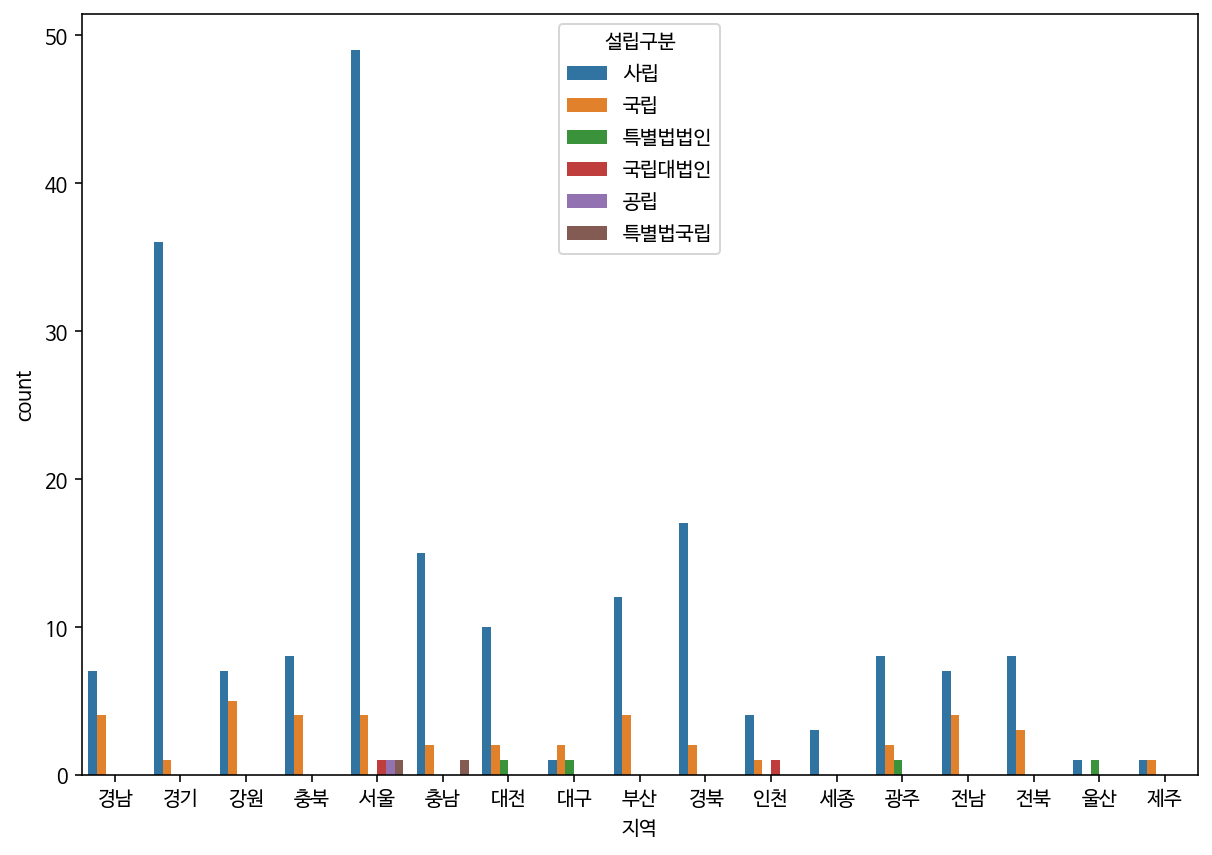

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(x='지역', hue='설립구분', data=df)
plt.show()

+ 지역별 등록금 평균

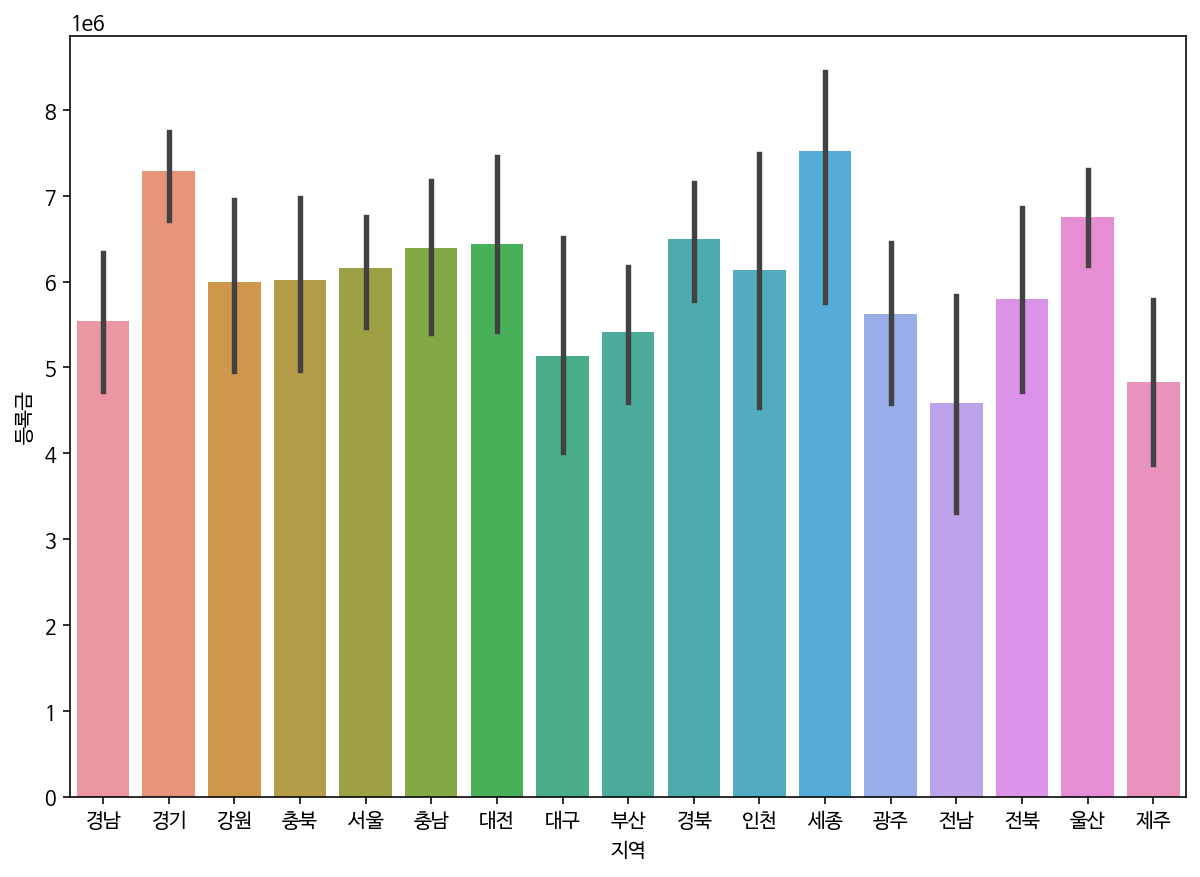

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x='지역', y='등록금', data=df)
plt.show()

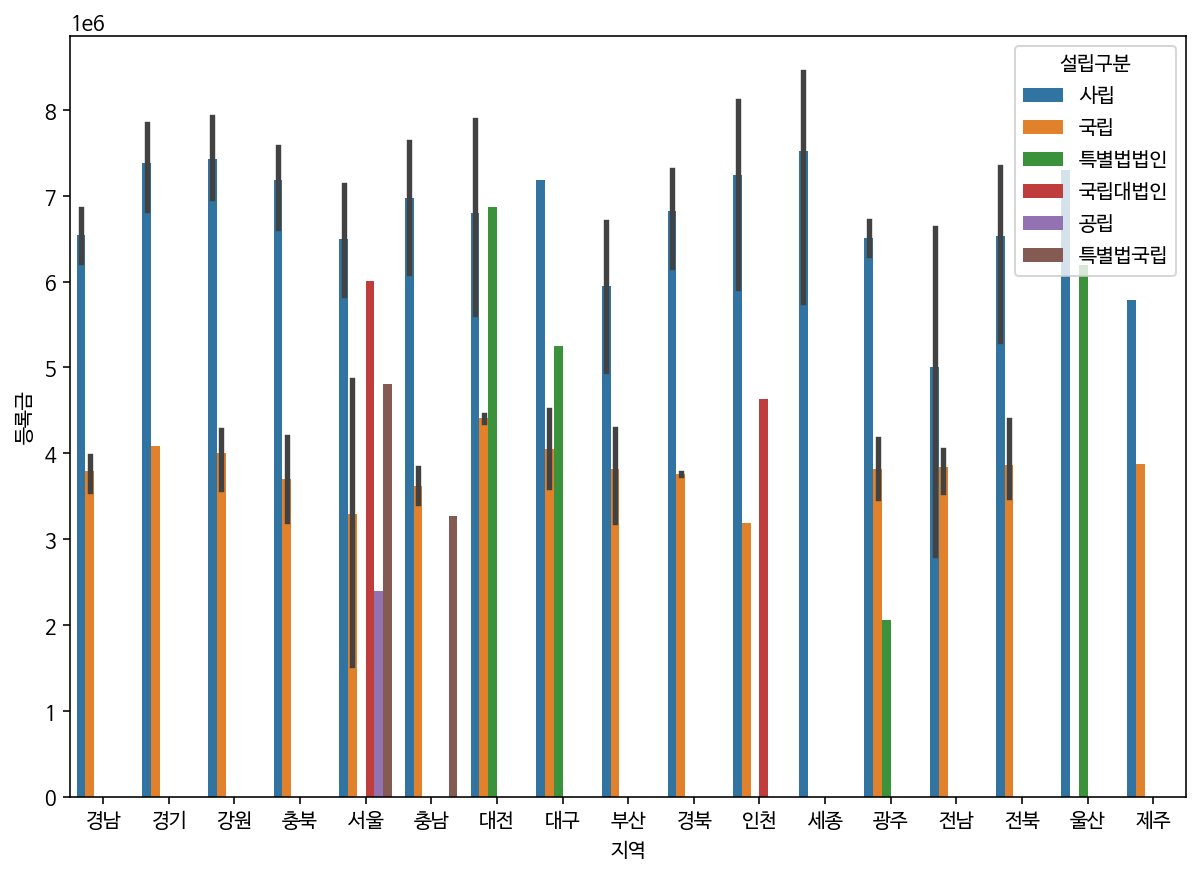

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x='지역', y='등록금', hue='설립구분', data=df)
plt.show()

+ 평균등록금 보다 많이 내는 학교수를 지역별 카운트 그래프

In [41]:
 df2 = df[df['등록금'] > df['등록금'].mean()]

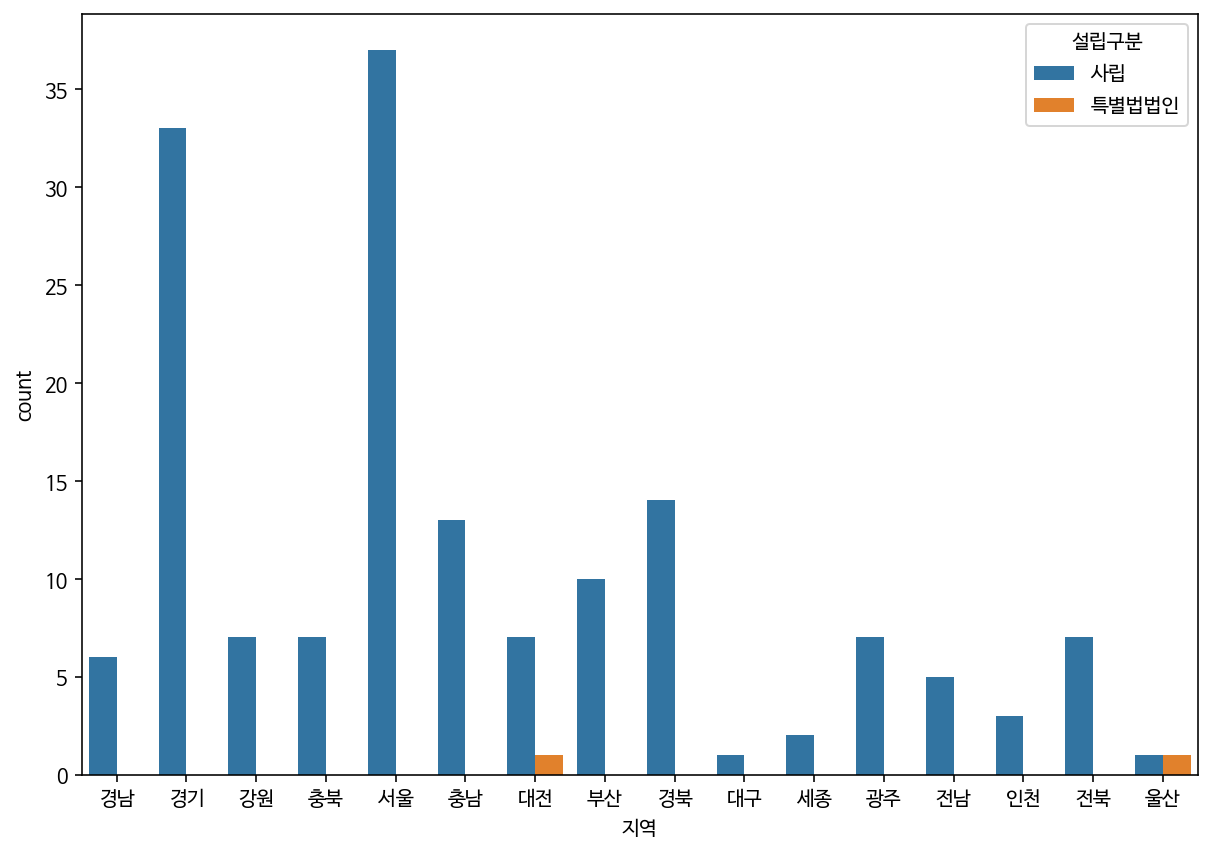

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x='지역', hue='설립구분', data=df2)
plt.show()